In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#import file

df=pd.read_excel("/content/superstore_sales.xlsx")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [3]:
#check if there is empty data
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [5]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [20]:
#groupby product_name and see sales
product_name_sales=pd.DataFrame(df.groupby("product_name").sum()["sales"])[:5]
product_name_sales.sort_values(by='sales',ascending=False, inplace=True)
product_name_sales

<ipython-input-20-63ba3142d5bc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_name_sales=pd.DataFrame(df.groupby("product_name").sum()["sales"])[:5]


,sales
product_name,
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
#10 Self-Seal White Envelopes,108.682
"#10 Gummed Flap White Envelopes, 100/Box",41.300
"""While you Were Out"" Message Book, One Form per Page",25.228


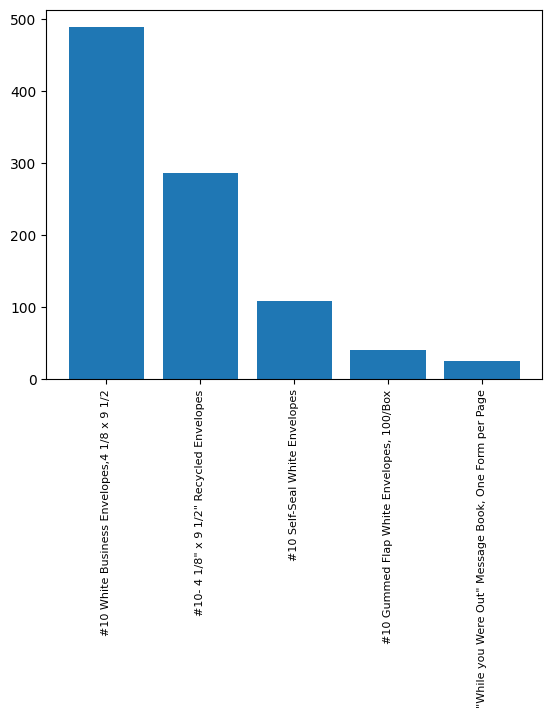

In [28]:
#make bar of product_name_sales
plt.bar(product_name_sales.index, product_name_sales["sales"])

plt.xticks(rotation='vertical', size=8)
plt.show()

In [32]:
#make bar of profit_name_sales
profit_name_sales=pd.DataFrame(df.groupby("segment").sum()["profit"])
profit_name_sales.sort_values(by=["profit"],ascending=False, inplace=True)
profit_name_sales

<ipython-input-32-4181421cdb8f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_name_sales=pd.DataFrame(df.groupby("segment").sum()["profit"])


,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


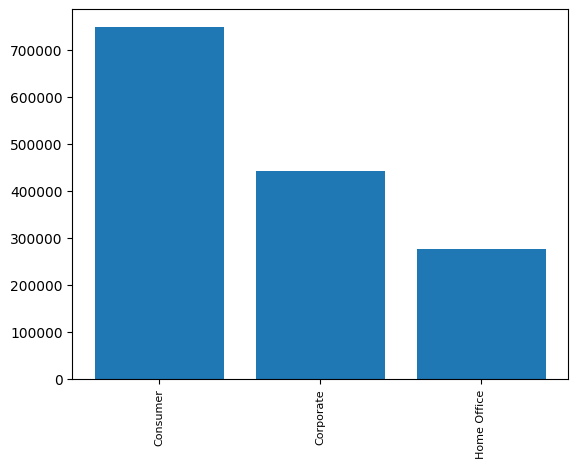

In [34]:
plt.bar(profit_name_sales.index, profit_name_sales["profit"])

plt.xticks(rotation='vertical', size=8)
plt.show()

In [38]:
#groupby'category', 'sub_category' and check quantity

pd.DataFrame(df.groupby(['category','sub_category']).sum()["quantity"])

<ipython-input-38-aff66890e965>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df.groupby(['category','sub_category']).sum()["quantity"])


quantity
category        sub_category          
Furniture       Bookcases         8310
                Chairs           12336
                Furnishings      11225
                Tables            3083
Office Supplies Appliances        6078
                Art              16301
                Binders          21429
                Envelopes         8380
                Fasteners         8390
                Labels            9322
                Paper            12822
                Storage          16917
                Supplies          8543
Technology      Accessories      10946
                Copiers           7454
                Machines          4906
                Phones           11870

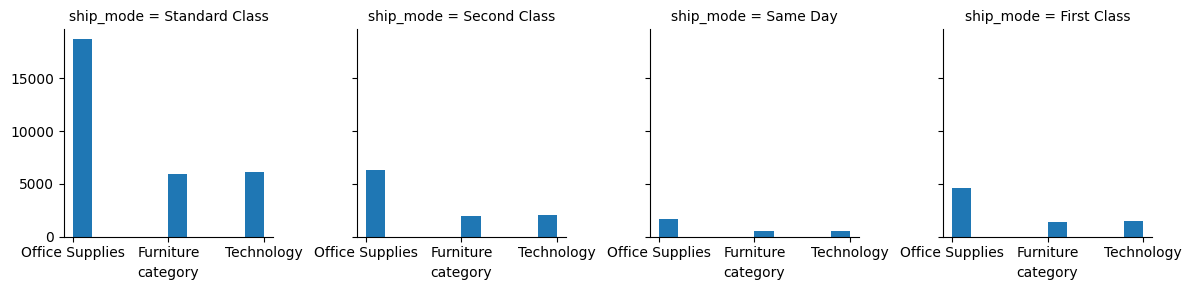

In [40]:
category_name=sns.FacetGrid(df,col='ship_mode')
category_name.map(plt.hist,'category')

In [42]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


###add month column

In [44]:
df['month'] = df['order_date'].dt.month
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,12


In [51]:
#groupby year and month
month_year=df.groupby(["year","month"]).sum()
month_year

<ipython-input-51-7c922432521d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_year=df.groupby(["year","month"]).sum()


sales  quantity  discount       profit  shipping_cost
year month                                                              
2011 1       98898.48886      1463    68.758   8321.80096    10544.78800
     2       91152.15698      1224    52.252  12417.90698    10681.16300
     3      145729.36736      1836    74.212  15303.56826    13096.18550
     4      116915.76418      2020    80.782  12902.32438    12954.52000
     5      146747.83610      2013    82.382  12183.82870    16443.20600
     6      215207.38022      3112   159.534  23415.24702    23813.10900
     7      115510.41912      1774    80.086   5585.00352    11844.47600
     8      207581.49122      3035   121.462  23713.66772    22001.13600
     9      290214.45534      3707   137.678  35776.88394    29664.85100
     10     199071.26404      2727   110.192  25963.41834    21380.08200
     11     298496.53752      4039   178.836  32709.17772    34701.99800
     12     333925.73460      4493   187.220  40647.98400    37144.83100
2012 1      135780.72024      1845    74.454  10401.63764    13665.74900
     2      100510.21698      1473    62.784  15000.09618    11393.72600
     3      163076.77116      2237   101.682  17992.91756    16170.78500
     4      161052.26952      2250    93.248  17366.96722    16767.86200
     5      208364.89124      2921   114.272  29876.70374    23801.61700
     6      256175.69842      3671   168.284  34407.15362    28155.90000
     7      145236.78512      2321   104.404  15585.38842    17334.43500
     8      303142.94238      3818   136.166  43573.87858    32038.73000
     9      289389.16564      4205   169.070  27776.18034    28023.17800
     10     252939.85020      3563   135.866  30662.88270    25085.74000
     11     323512.41690      5193   215.868  31820.72180    33489.74100
     12     338256.96660      4614   172.676  32950.75130    37563.36100
2013 1      199185.90738      2413    91.442  26810.55968    21677.43200
     2      167239.65040      2102    78.012  25340.02610    16911.85000
     3      198594.03012      2686   114.384  23433.77462    21268.01000
     4      177821.31684      2688   116.116  19462.03844    19133.23400
     5      260498.56470      3808   153.092  28495.69410    28315.21100
     6      396519.61190      5327   213.642  45478.41340    42814.02600
     7      229928.95200      3252   125.644  28863.82720    24501.84236
     8      326488.78936      4934   202.640  31023.66846    35673.08800
     9      376619.24568      5793   240.674  38905.66778    38488.40000
     10     293406.64288      3883   160.860  42433.22258    31174.68400
     11     373989.36010      5556   215.324  48062.99670    41407.16700
     12     405454.37802      5694   223.692  50202.87112    43183.80000
2014 1      241268.55566      3122   127.928  28001.38626    24870.80100
     2      184837.35556      2482   111.126  19751.69996    19525.80000
     3      263100.77262      3722   142.016  37357.26052    26838.63554
     4      242771.86130      3594   164.000  23782.30120    26272.71800
     5      288401.04614      4300   188.986  33953.55774    31882.58300
     6      401814.06310      6009   251.462  43778.60280    41894.07600
     7      258705.68048      3637   163.512  28035.87258    29581.73300
     8      456619.94236      5824   217.672  53542.89496    46759.35300
     9      481157.24370      6837   272.094  67979.45110    53485.43000
     10     422766.62916      5876   233.752  58209.83476    44622.41400
     11     555279.02700      7706   304.384  62856.58790    59918.35500
     12     503143.69348      7513   335.106  46916.52068    54853.89100

In [60]:
#groupby country to check sales
country_sales=pd.DataFrame(df.groupby("country").sum()['sales'])
country_sales.sort_values(by="sales", ascending=False, inplace=True)
country_sales.head(10)

<ipython-input-60-877b4b883452>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_sales=pd.DataFrame(df.groupby("country").sum()['sales'])


,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


Text(0.5, 1.0, 'Top 10 countries by sales')

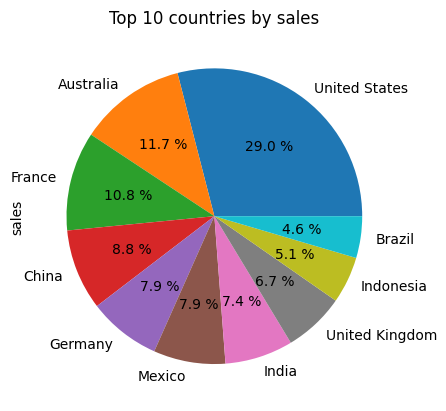

In [63]:
country_sales[:10]["sales"].plot(kind="pie", autopct="%1.1f %%")
plt.title("Top 10 countries by sales")

In [65]:
#check top 10 countries with max shipping fee
country=df.groupby('country').agg({'shipping_cost':'max'}).sort_values('shipping_cost',ascending=False).head(10)
country

,shipping_cost
country,
United States,933.57
Australia,923.63
Germany,910.16
Senegal,903.04
New Zealand,894.77
Afghanistan,835.57
Saudi Arabia,832.41
Brazil,810.25
China,804.54


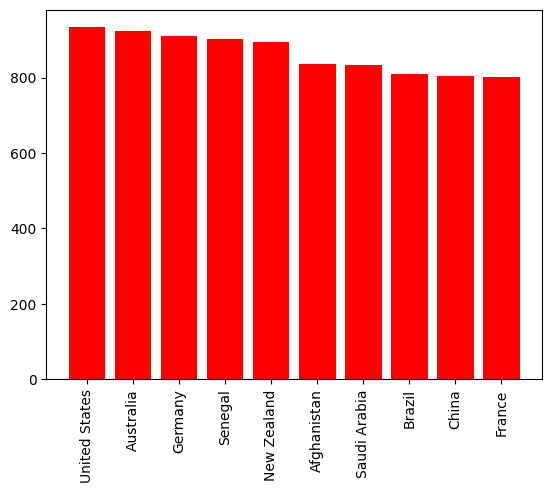

In [68]:
plt.bar(country.index, country['shipping_cost'], color='r')
plt.xticks(rotation='vertical')
plt.show()